In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Downloads/mlcourse.ai-master/data/mlbootcamp5_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 1 задание

In [4]:
df.pivot_table(['height'], ['gender'], aggfunc='mean')

,height
gender,
1,161.355612
2,169.947895


In [5]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [6]:
d={1:'F', 2:'M'}

In [7]:
df['gender']=df['gender'].map(d)

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,M,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,F,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,F,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,M,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,F,156,56.0,100,60,1,1,0,0,0,0


# 2 задание

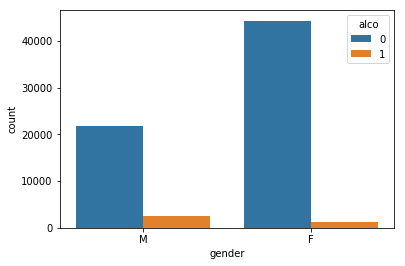

In [9]:
sns.countplot(x='gender', hue='alco', data=df)

# 3 вопрос

In [10]:
a=0
b=0
for i in df[df['gender'] == 'F']['smoke']:
    if i == 1:
        a+=1
    else:
        b+=1
print(round(a/(a+b)*100,0))
    

2.0


In [11]:
a=0
b=0
for i in df[df['gender'] == 'M']['smoke']:
    if i == 1:
        a+=1
    else:
        b+=1
print(round(a/(a+b)*100,0))

22.0


# 4 Ззадание

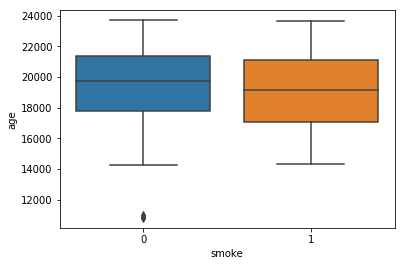

In [12]:
sns.boxplot(x='smoke', y='age', data=df)

In [13]:
round(df[df['smoke']==0]['age'].median() - df[df['smoke']==1]['age'].median())

597.0

In [23]:
i=1
while i < 10000:
    if (597/(i)) == 5 or (597/(i)) == 10 or (597/(i)) == 15 or round(597/(i)) == 20:
        print(i)
    i+=1

30


In [27]:
round(597/365)

2

In [50]:
# пометка если будет кто-то проверять* : применил раунд к каждому условию и только в этом случае получался один ответ, ну и 
# соответственно единица измерения = 30 дней, или один месяц, но 30 дней - точнее ))0

# поправочка - как решать хз)

In [31]:
df_=df.copy()

In [47]:
df_['age_years']=round(df_['age']/365)

    

In [48]:
df_.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,M,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,F,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,F,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,M,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,F,156,56.0,100,60,1,1,0,0,0,0,48.0


In [49]:
round(df_[df_['smoke']==0]['age_years'].median() - df_[df_['smoke']==1]['age_years'].median())


2.0

# Задание 5

In [105]:
df__=df_[(df_['age_years'] <= 64) & (df_['age_years'] > 60) & (df_['smoke']==1) & (df__['gender']=='M')]

In [106]:
df__.count()

id             651
age            651
gender         651
height         651
weight         651
ap_hi          651
ap_lo          651
cholesterol    651
gluc           651
smoke          651
alco           651
active         651
cardio         651
age_years      651
dtype: int64

In [110]:
df__[(df__['ap_hi']<120) & (df__['cholesterol']==1)]['cardio'].value_counts()

0    28
1    10
Name: cardio, dtype: int64

In [111]:
df__[(df__['ap_hi']>=160)&(df__['ap_hi']<180) & (df__['cholesterol']==3)]['cardio'].value_counts()

1    10
0     1
Name: cardio, dtype: int64

In [119]:
round((10/38)/(10/11)), \
round((10/11)/(10/38))

(0, 3)

# Задание 1.6

In [122]:
df_['BMI']=(df_['weight'])/(((df_['height'])/100)**2)

In [125]:
df_.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,M,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,20228,F,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,18857,F,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,17623,M,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,17474,F,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [127]:
df_[df_['gender']=='F']['BMI'].mean(),\
df_[df_['gender']=='M']['BMI'].mean()

(27.98758344183285, 26.754442357289356)

In [129]:
df_[df_['cardio']==1]['BMI'].mean(),\
df_[df_['cardio']==0]['BMI'].mean()

(28.56606062701535, 26.5481752067945)

In [131]:
21.75

21.75

In [133]:
df_[(df_['cardio']==1)&(df_['alco']==0)&(df_['gender']=='F')]['BMI'].mean(),\
df_[(df_['cardio']==1)&(df_['alco']==0)&(df_['gender']=='M')]['BMI'].mean()

(29.052771124352695, 27.522449558682403)

In [134]:
df_['BMI'].median()

26.374068120774975

# Задание 1.7

In [135]:
2/13*100,\
2/15*100
# -idk

(15.384615384615385, 13.333333333333334)

# Задание 2.1

In [139]:
d={'F':1, 'M':2}
df['gender']=df['gender'].map(d)

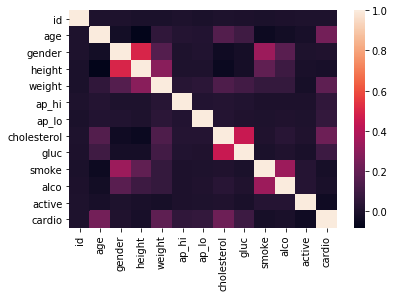

In [150]:
sns.heatmap(df.corr())

In [151]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


# Задание 2.2

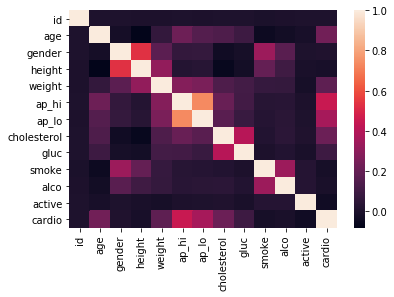

In [154]:
sns.heatmap(df.corr(method='spearman'))

# Задание 2.3

In [156]:
# Я что, медик?)

# Задание 2.5

In [172]:
spisk=[44,55,64,70]
dflast=df_[df_['age_years'].isin(spisk)]

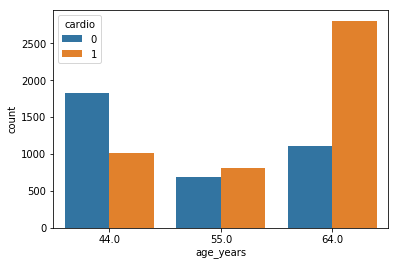

In [175]:
sns.countplot(x='age_years', hue='cardio', data=dflast)

In [185]:
df_['age_years'].unique()

array([50., 55., 52., 48., 60., 61., 62., 54., 41., 40., 46., 58., 59.,
       63., 64., 57., 56., 49., 51., 44., 65., 45., 53., 47., 42., 39.,
       43., 30.])